In [309]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
df = pd.read_csv('Absenteeism_at_work.tsv',sep='\t')
df_copy = df.copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [310]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


/Users/eli_ahlander/Documents/DevMountain/DA/codeChallenges/correlation-trials/env/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4529: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


SpearmanrResult(correlation=nan, pvalue=nan)

In [312]:
np.corrcoef(df['Social drinker'],
            df['Social smoker'])

array([[ 1.      , -0.111678],
       [-0.111678,  1.      ]])

In [313]:
pearsonr(df['Social drinker'],
            df['Social smoker'])

(-0.11167800453514744, 0.0023473383748544353)

In [314]:
pearsonr(df['Transportation expense'],
            df['Distance from Residence to Work'])

(0.26218311063190813, 4.2533009832568887e-13)

In [315]:
spearmanr(df['Transportation expense'],
            df['Distance from Residence to Work'])

SpearmanrResult(correlation=0.287267232417557, pvalue=1.5881778161806322e-15)

In [316]:
spearmanr(df['Month of absence'],
            df['Age'])
            #very little to no correlation, not significant

SpearmanrResult(correlation=0.0016805552597149393, pvalue=0.9635981476773132)

In [317]:
spearmanr(df['Reason for absence'],
            df['Day of the week'])
            #very little correlation, significant

SpearmanrResult(correlation=0.12246263308006687, pvalue=0.0008429727110657151)

In [318]:
df['Reason for absence'] = df['Reason for absence'].astype(str)


In [319]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [320]:
df.groupby('Day of the week')['Reason for absence'].value_counts()

Day of the week  Reason for absence
2                23                    22
                 28                    22
                 13                    12
                 19                    11
                 11                    10
                 25                    10
                 26                    10
                 27                    10
                 10                     9
                 22                     9
                 7                      7
                 0                      6
                 1                      6
                 18                     5
                 14                     3
                 12                     2
                 6                      2
                 15                     1
                 21                     1
                 24                     1
                 8                      1
                 9                      1
3                23                    3

In [321]:
df_copy
twenty_three_copy = df_copy.query('`Reason for absence` == 23')
twenty_three_grouped = twenty_three_copy.groupby('Day of the week').size()
absence_by_day = twenty_three_grouped.to_frame()
absence_by_day = twenty_three_grouped.to_frame()
absence_by_day.reset_index(inplace = True)
absence_by_day.columns = ['Day of the week', 'top absence Occurances']

<BarContainer object of 0 artists>

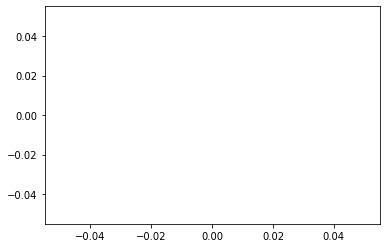

In [322]:
twenty_three = df.query('`Reason for absence` == 23')
twenty_three['Reason for absence']

plt.bar(twenty_three['Day of the week'],twenty_three['Reason for absence'])

In [323]:
twenty_three

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours


In [324]:
twenty_three_grouped = twenty_three.groupby('Day of the week').size()

In [325]:
twenty_three_grouped

Series([], dtype: int64)

In [326]:
absence_by_day = twenty_three_grouped.to_frame()
absence_by_day

,0
Day of the week,


In [327]:
absence_by_day = twenty_three_grouped.to_frame()
absence_by_day.reset_index(inplace = True)
absence_by_day

,Day of the week,0


In [328]:
absence_by_day.columns = ['Day of the week', 'top absence Occurances']
absence_by_day

,Day of the week,top absence Occurances


Text(0, 0.5, 'Occurances')

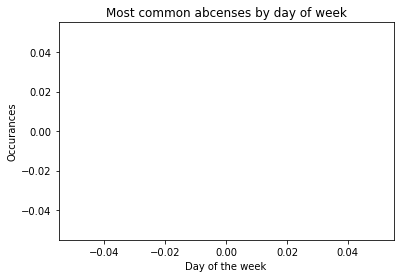

In [329]:
# sets x and y axis values to plot
x = absence_by_day['Day of the week']
y = absence_by_day['top absence Occurances']

plt.bar(x,y)

plt.title('Most common abcenses by day of week')

plt.xlabel('Day of the week')
plt.ylabel('Occurances')

In [330]:
spearmanr(df['Hit target'],
            df['Disciplinary failure'])
            #very little correlation, significant p value

SpearmanrResult(correlation=-0.11472538854357511, pvalue=0.001772504612734226)

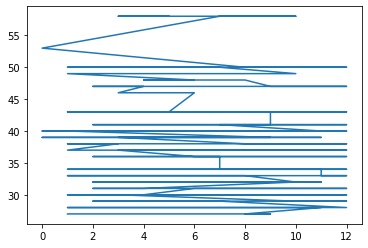

In [331]:
age_and_month = df[['Age','Month of absence']].sort_values(by='Age')
plt.plot(age_and_month['Month of absence'], age_and_month['Age'])

Text(0, 0.5, 'Age')

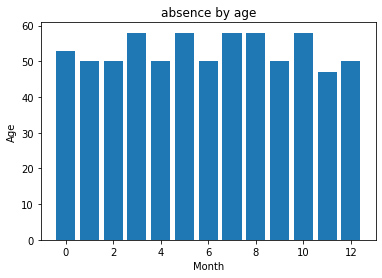

In [332]:
x = age_and_month['Month of absence']
y = age_and_month['Age']

plt.bar(x,y)

plt.title('absence by age')

plt.xlabel('Month')
plt.ylabel('Age')

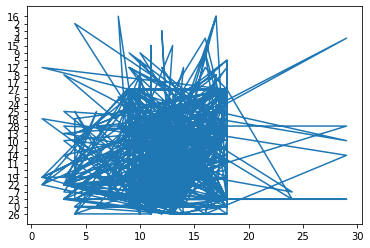

In [333]:
spearmanr(df['Service time'],
            df['Reason for absence'])
            #very little to no correlation
plt.plot(df['Service time'],
            df['Reason for absence'])

In [334]:
spearmanr(df['Transportation expense'],
            df['Reason for absence'])
            #little correlation, highly signigicant


SpearmanrResult(correlation=-0.12335601026796923, pvalue=0.0007714924987641629)

In [335]:
distance_and_expense = df[['Distance from Residence to Work','Transportation expense']]
distance_and_expense = distance_and_expense.sort_values('Distance from Residence to Work')

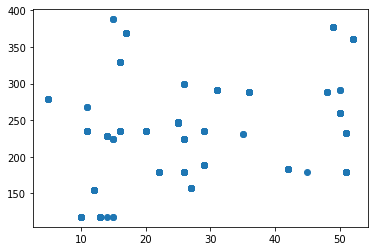

In [336]:
plt.scatter(distance_and_expense['Distance from Residence to Work'], distance_and_expense['Transportation expense'])

In [337]:
spearmanr(df['Age'],
            df['Pet'])
            #little correlation, highly significant


SpearmanrResult(correlation=-0.27576995864941006, pvalue=2.2121000884657082e-14)

Text(0, 0.5, 'Number of pets')

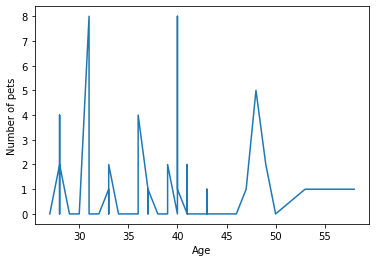

In [338]:
Age_and_pet = df[['Age','Pet']]
Age_and_pet = Age_and_pet.sort_values('Age')
plt.plot(Age_and_pet['Age'], Age_and_pet['Pet'])
plt.xlabel('Age')
plt.ylabel('Number of pets')

In [339]:
spearmanr(df['Absenteeism time in hours'],
            df['Month of absence'])
            #no correlation, not significant

SpearmanrResult(correlation=0.009767735806053378, pvalue=0.7908027956418036)

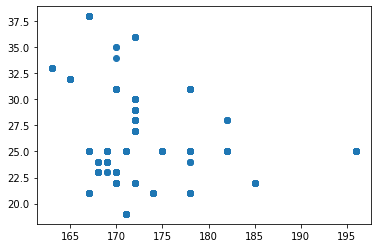

In [340]:
spearmanr(df['Height'],
            df['Body mass index'])
            #little correlation
plt.scatter(df['Height'],
            df['Body mass index'])

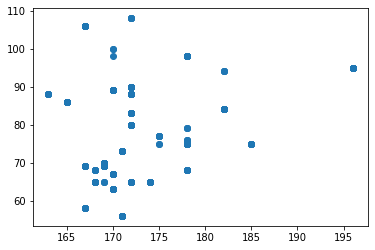

In [341]:
spearmanr(df['Height'],
            df['Weight'])
            #medium correlation, significant
plt.scatter(df['Height'],
            df['Weight'])

In [342]:
spearmanr(df['Pet'],
            df['Disciplinary failure'])
            #no correlation, not signigicant

SpearmanrResult(correlation=-0.0038737178518088527, pvalue=0.9162180838872527)